## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. ~~Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.~~

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. ~~Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?~~
3. ~~Create a scree plot for each of the datasets.~~ ~~Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)~~
4. ~~Explain the intuition of the elbow, using this numerical simulation as an example.~~

#### question one

In [1]:
# generating datasets 
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
# noisier and noisier. 
# i take that the values here indicate standard deviations 

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


#### question two

In [2]:
# how do we want to plot all of these? 
# it helps to see what data we have first. 
df0_125.head()

,x1,x2,group
0,0.781279,0.851498,a
1,1.042835,0.931282,a
2,1.144129,0.882494,a
3,0.968445,0.896508,a
4,1.122665,1.013608,a


In [3]:
# what about one of the other datasets? 
df1_0.head()
# similar stuff different name

,x1,x2,group
0,-0.749765,-0.188018,a
1,1.342680,0.450254,a
2,2.153036,0.059954,a
3,0.747564,0.172068,a
4,1.981321,1.108863,a


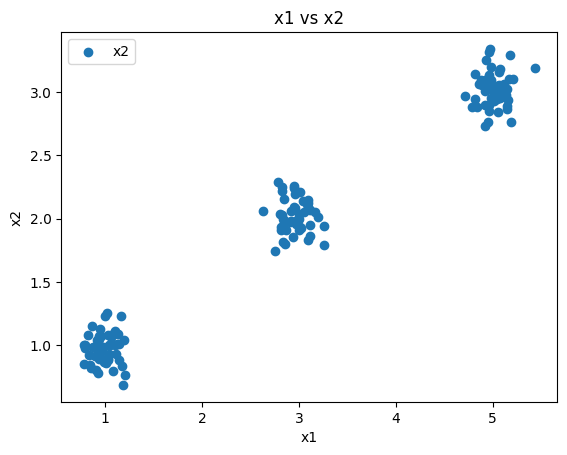

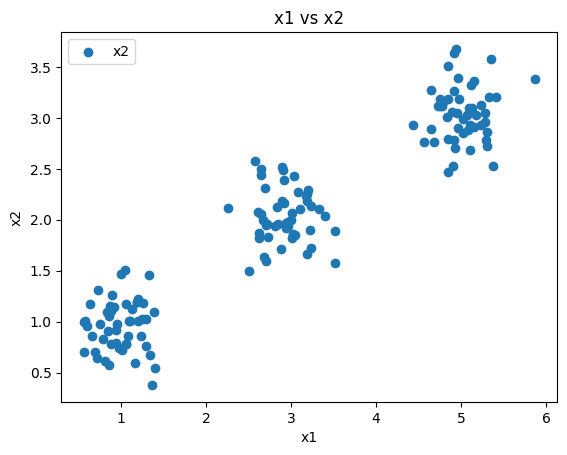

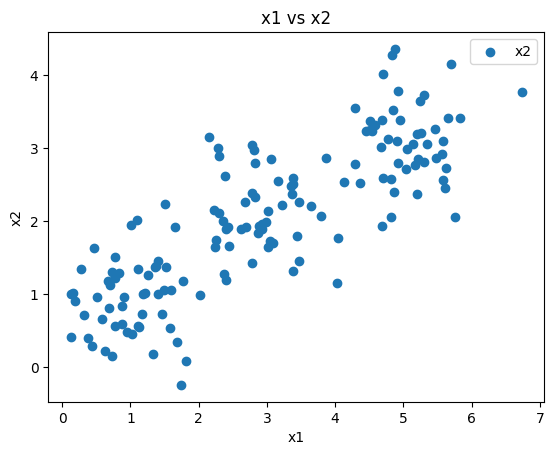

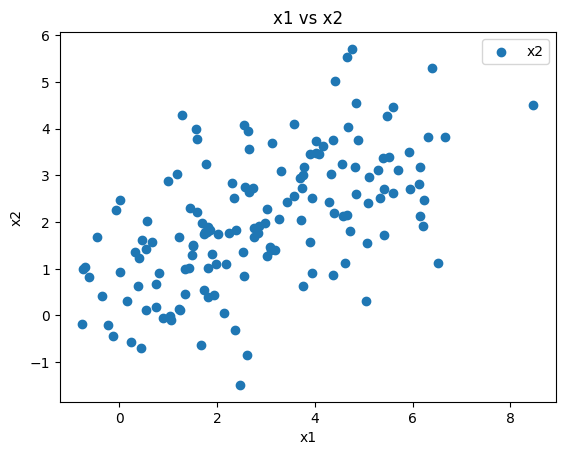

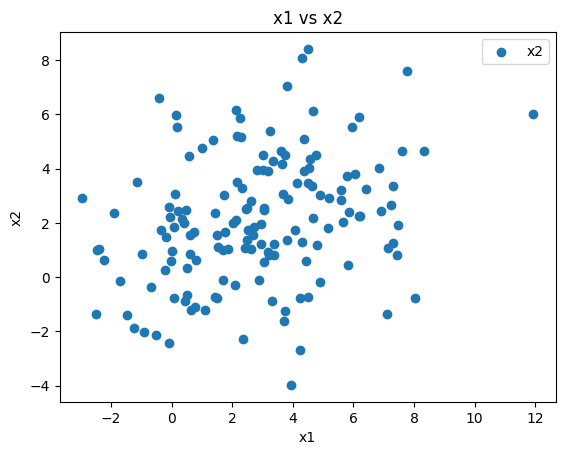

In [4]:
# importing relevant packages for making graphics
# if i got enough time, i'll colour the clusters. 
# i couldn't find a straightforward way to do the equivalent of 
# sns.scatterplot(hue='variable') in matplotlib
import matplotlib.pyplot as plt
# can't we loop through all of the datasets? 
datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
for i in datasets:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(data=i, x="x1", y="x2")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title("x1 vs x2")
    plt.legend()
    plt.show()

As the amount of noise increases, the visual distinctness of the cluster decreases drastically. By the time we reach a noise value of 1.0, the three clusters become one large amorphous blob. 

#### question three 

In [5]:
# we need to turn our datasets into feature matrices. 
x_0125 = df0_125.loc[:, ["x1", "x2"]]
x_025 = df0_25.loc[:, ["x1", "x2"]]
x_05 = df0_5.loc[:, ["x1", "x2"]]
x_1 = df1_0.loc[:, ["x1", "x2"]]
x_2 = df2_0.loc[:, ["x1", "x2"]]
# i know this would be more efficient to do in a for-loop but to be quite...
# ...frank i dunno how to create a different name for each dataset with...
# ...the for loop 

In [6]:
# defining the max-min scaler function 
# (what methods of standardisation exist and how do we know the best?) 
def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x

In [7]:
# again a more efficient way to do this could have been a for-loop. 
# but i don't know how to do one where i create a new variable name...
# ...every cycle
x_0125 = x_0125.apply(maxmin)
x_025 = x_025.apply(maxmin)
x_05 = x_05.apply(maxmin)
x_1 = x_1.apply(maxmin)
x_2 = x_2.apply(maxmin)

In [8]:
# did that work 
x_2.head()
# yay

,x1,x2
0,0.030053,0.209668
1,0.311351,0.312679
2,0.420291,0.249688
3,0.231346,0.267782
4,0.397206,0.418972


In [9]:
# preparing to create scree plot. 
# importing k-means clustering 
from sklearn.cluster import KMeans 
# importing seaborn 
import seaborn as sns

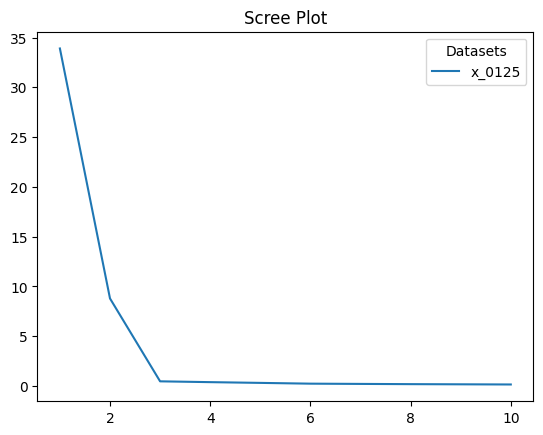

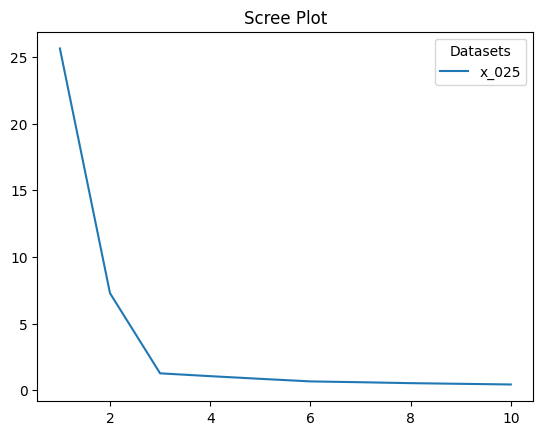

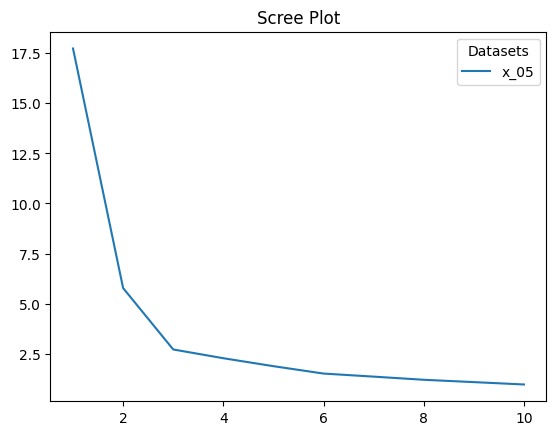

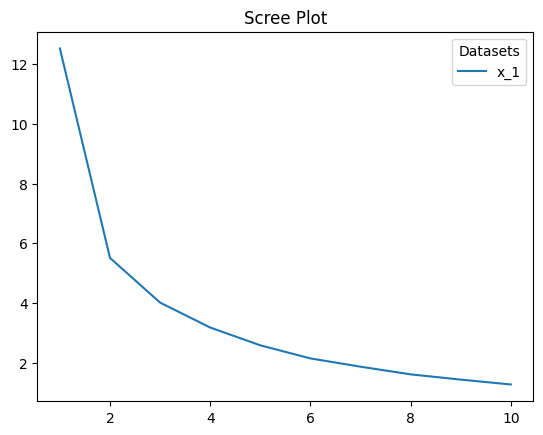

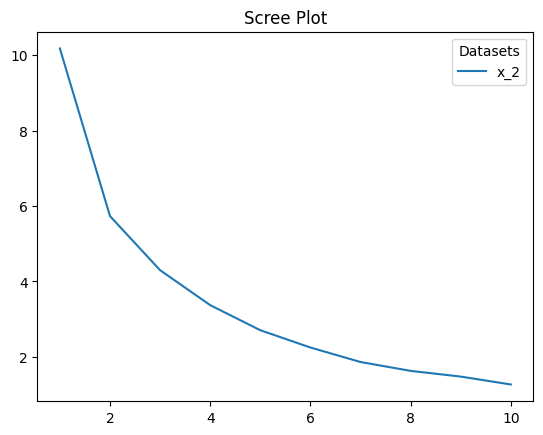

In [10]:
# list of dataframes to iterate through to make scree plots. 
datasets_matrices = [x_0125, x_025, x_05, x_1, x_2]
dataset_names = ["x_0125", "x_025", "x_05", "x_1", "x_2"]
# Create a scree plot:
for i, j in zip(datasets_matrices, dataset_names):
    k_bar = 10
    SSE = [] # training error 
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(i) # Fit the model
        SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector  
    scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot
    plt.legend([j], title="Datasets")
    plt.show()
    # top two lines (as well as the creation of the dataset names list...
    # ...and the idea to iterate over two lists at once) is from chatgpt. 
    # couldn't find straightforward info i could understand at this hour about...
    # looping through a list to create legend names. 

The greater the amount of noise, the less defined the elbow of the skree plot, making it more difficult to select an ideal 'k' value. The SSE represented in the plots also starts off *much* larger when there is less noise, but it pummels far less quickly. As k increases, the SSE for a dataset with more noise is increasingly likely to be greater than SSE for a dataset with less noise.

In the real world, data is not as likely to exist in neatly-arranged clusters (just look at the mines dataset we worked with!), so "real" skree plots may look like the ones created for our noisier datasets. 

#### question four

In [11]:
# i'm not gonna lie i'm an overthinker so i had to ask chatgpt what was...
# ...meant by 'intuition'. intuition means 'purpose'. ok

The purpose of the elbow plot is to help a data scientist discern how many clusters would be needed for k-means clustering on their dataset. One performs k-means clustering on their data given a certain number of clusters *k*, plots the resulting SSE on a line plot, and repeats the process for other values of *k.* Ideally, they should see inflection point where the plot's slope flattens dramatically, the x-value of the point representing an optimal number of clusters. The scree plot for our dataset `df0_125` represents the ideal scenario: it had a dramatic inflection point at x=3 - indicating that our optimal *k* value was 3 - and the corresponding scatterplot indeed showed 3 defined clusters. Any *k* value greater than 3 risked overfitting; any *k* value less than 3 did not represent the very obvious patterns in the data. Meanwhile, scree plots for `df1_0` and `df2_0` represented less than ideal - though more realistic - scenarios, where clusters are ill-defined and the scree plot's slope flattens more gently, meaning that the data scientist is forced to lean heavily on personal discretion to discern an optimal *k*.

**Q2.** This question is a case study on clustering.

1. ~~Load the `2022 election cycle fundraising.csv` file in the `./data` folder.~~ ~~This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?~~
2. ~~Max-min normalize `Raised` and `Spent`.~~ ~~Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm.~~ ~~Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership.~~ ~~What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.~~
3. ~~Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2.~~ ~~Why might this be? If necessary, look up some of these races to see how close they were.~~
4. ~~Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?~~
5. ~~Did the $k$-MC algorithm find useful patterns for you in analyzing the election?~~

#### question one

In [12]:
# loading the data
fundraising_data = pd.read_csv("./data/clusterf/2022 election cycle fundraising.csv")

In [13]:
# brief survey of the data
fundraising_data.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [14]:
# i immediately know that what i should do with the price data is...
# ...strip off the dollar signs.

# creating a list of columns to iterate through 
columns_list = ["Raised", "Spent", "Cash on Hand", "Debts"]

# using the replace method to clean out cash signs and commas. 
for i in columns_list: 
    fundraising_data[i] = fundraising_data[i].str.replace('$', '')
    fundraising_data[i] = fundraising_data[i].str.replace(',', '')

In [15]:
# i'm going to survey the types of data we have in our dataframe now. 
fundraising_data.iloc[:, 5:].head()
# seems to be things coercable into integers. 

,Raised,Spent,Cash on Hand,Debts
0,7719396,7449678,851851,0
1,2192741,1243502,2472888,0
2,20993041,13957854,20942888,0
3,1211111,1173466,623472,0
4,1617611,1664674,1098579,0


In [16]:
# we're gonna go ahead and coerce the data, then we'll do a magic trick 
# (SOON!) 

# iterate through our list of column names to coerce data.  
for i in columns_list: 
    fundraising_data[i] = pd.to_numeric(fundraising_data[i], errors="coerce")

In [17]:
# i want to check if we were successful 
# gonna check fundraising_data
fundraising_data.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


In [18]:
# also going to triple check data types 
for i in columns_list:
    print(type(fundraising_data[i][0]))
# yep!

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [19]:
# after that, take all the indices where there are NaNs and survey...
# ...the data that was indeed at those indices. 

# we'll first do that by creating a dataframe(s) where everything NA = TRUE
# (there IS a way to do a for-loop where you generate a different variable with...
# ...every iteration of the for-loop but i'm frankly too lazy to do it) 
na_raised = pd.DataFrame(fundraising_data["Raised"].isna())
na_spent = pd.DataFrame(fundraising_data["Spent"].isna())
na_cash = pd.DataFrame(fundraising_data["Cash on Hand"].isna())
na_debts = pd.DataFrame(fundraising_data["Debts"].isna())

# let's now drop the FALSE values so we only have spots where we had NAs...
# ...and their indices 

# creating a list of the na dataframes that we can loop through 
na_dataframes = [na_raised, na_spent, na_cash, na_debts]

# interested in the length of each 
for i in na_dataframes: 
    i = i.where(i == True)
    i = i.dropna()
    print(len(i)) # to see if we have any indices where there were words/spaces...
    # ...to worry about at all

# seems we have no indices were there were words/spaces anywhere anymore.

0
0
0
0


#### question two

In [20]:
# making our feature matrix. 
X1 = fundraising_data.loc[:, ["Raised", "Spent"]]
X1.head()

,Raised,Spent
0,7719396,7449678
1,2192741,1243502
2,20993041,13957854
3,1211111,1173466
4,1617611,1664674


In [21]:
# defining the max-min normalisation function. 
def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x

In [22]:
# a surprise tool that will help us later...
# ...should we want to plot centroids (which isn't asked by the question but...
# ...i might do it anyways if relevant.) 
raised_max = max(X1["Raised"])
raised_min = min(X1["Raised"])
spent_max = max(X1["Spent"])
spent_min = min(X1["Spent"])

In [23]:
# max-min normalising our feature matrix. 
X1 = X1.apply(maxmin)
X1.head()

,Raised,Spent
0,0.103512,0.098074
1,0.040686,0.016371
2,0.254404,0.183753
3,0.029527,0.015449
4,0.034148,0.021915


In [24]:
# necessary package for k means clustering 
from sklearn.cluster import KMeans 

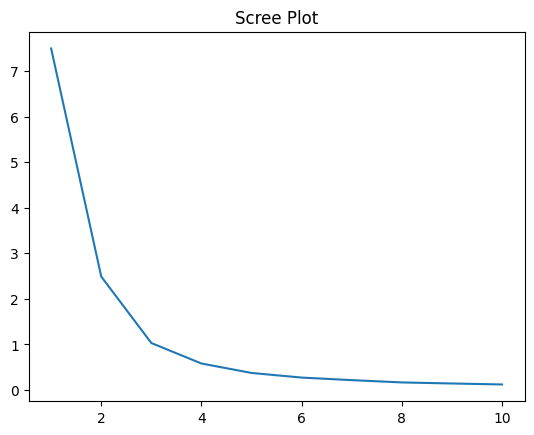

In [25]:
# SCREEEEEEEEE. 
# Create a scree plot:
k_bar = 10
SSE = [] # training error 
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X1) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector  
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot
plt.show()

The 'joint' on our elbow plot exists where k=3, but I do not see the graph really plateau until about k=6 through 8. I'll just say our ideal 'k' is 8. 

In [26]:
# importing seaborn 
import seaborn as sns
# import the k-means clustering thingy 
from sklearn.cluster import KMeans 

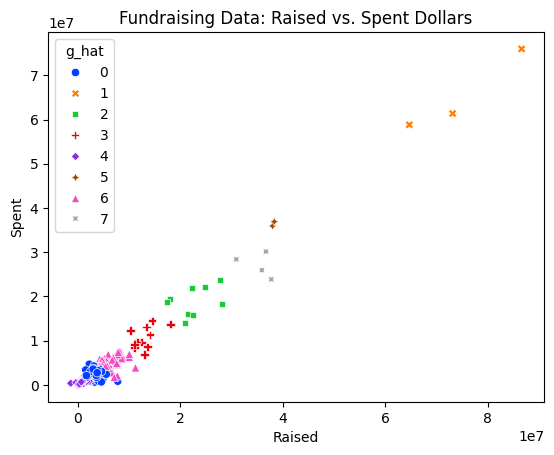

In [27]:
# creating a scatterplot of our dots

# yoinked code from codebook showed in class like a lot of code here...
# ...re-commented so i understand everything. 
model = KMeans(n_clusters=8, random_state=0) # canned kmeans model 
model = model.fit(X1) # fitting it over X1 (i still don't completely get what's...
# ...happening under the hood) 
fundraising_data['g_hat'] = model.predict(X1) # g-hat is our predicted clusters. 
 
this_plot = sns.scatterplot(data=fundraising_data,x='Raised',y='Spent',
                            palette="bright", hue='g_hat',style='g_hat').set_title('Fundraising Data: Raised vs. Spent Dollars')

In [28]:
# who are the politicians that make our smallest clusters? 
# seems like that will be the people with the top 5 amount of dollars raised...
# ...or spent 
whos_small_cluster = fundraising_data.sort_values(by="Spent",ascending=False)
whos_small_cluster.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat
417,417,Raphael Warnock,Democratic,Georgia,Senate,86581469,75959810,22762985,0,1
340,340,Mark Kelly,Democratic,Arizona,Senate,73140886,61357281,13186127,0,1
523,523,Val Demings,Democratic,Florida,House,64682883,58806664,6647641,0,1
499,499,Tim Ryan,Democratic,Ohio,House,38334636,36909832,1424804,68075,5
87,87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811,35928936,5089745,0,5


The politicians who make up the smallest two clusters are Raphael Warnock, Mark Kelly, Val Demings, Tim Ryan, and Catherine Cortez Masto.

I see a positive linear relationship between raised vs. spent dollars (the politicians who wished to spend more money understandably raised more money), though there is an extremely distinct cluster of data towards the right side of the graph. Warnock, Kelly, and Val each raised a massive sum of money far greater than that of their fellow politicians - and all of them spent it well, too, though they did not spend as much as they raised, which is probably better for them. I don't know why they spent so much, but the question implies that they were locked into horribly tight races. Such is a case where studying outliers in the data may be relevant! 

(After doing Question Three, I can see that they were more strategic than people who relied on personal wealth; the politicians discussed in the answer to Question Three already owned enormous sums of money, and they used their reserves as a financial clutch for their campaigns, falling into debt.) 

#### question three

In [29]:
# making our feature matrix. 
X2 = fundraising_data.loc[:, ["Cash on Hand", "Debts"]]
X2.head()

,Cash on Hand,Debts
0,851851,0
1,2472888,0
2,20942888,0
3,623472,0
4,1098579,0


In [30]:
# max-min normalising our feature matrix. 
X2 = X2.apply(maxmin)
X2.head()

,Cash on Hand,Debts
0,0.040154,0.0
1,0.111166,0.0
2,0.920268,0.0
3,0.030150,0.0
4,0.050962,0.0


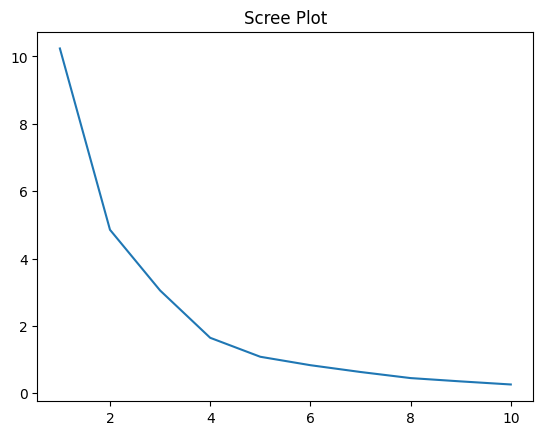

In [31]:
# SCREEEEEEEEE. 
# Create a scree plot:
k_bar = 10
SSE = [] # training error 
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X2) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector  
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot
plt.show()

No defined 'elbow' exists on our scree plot, but it seems to plateau where k=8. The optimal number of clusters for this particular dataset is likewise probably 8. 

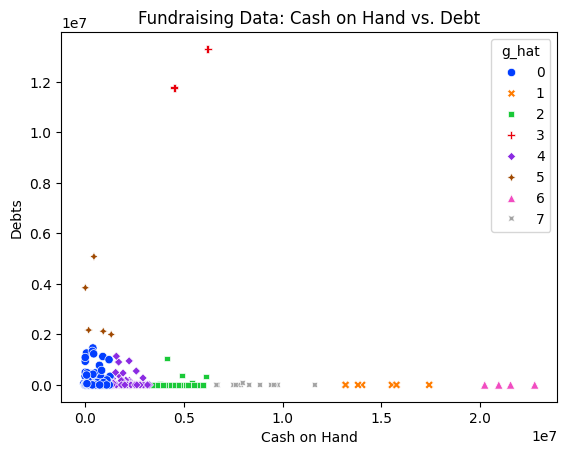

In [32]:
# creating a scatterplot of our dots

# yoinked code from previous question.  
model = KMeans(n_clusters=8, random_state=0) # canned kmeans model 
model = model.fit(X2) # fitting it over X2 
fundraising_data['g_hat'] = model.predict(X2) # g-hat is our predicted clusters. 
 
this_plot = sns.scatterplot(data=fundraising_data,x='Cash on Hand',y='Debts',
                            palette="bright", hue='g_hat',style='g_hat').set_title('Fundraising Data: Cash on Hand vs. Debt')

Unlike the scatterplot in Question 2, this question's scatterplot does NOT represent any sort of positive linear relationship (which is understandable, as it would probably take talent to fall into debt if you are wealthy enough to instantly conjure hundreds of thousands of dollars). The relationship between cash on hand and debt seems negative (though I can't tell if it is linear), as most of the politicians who have fallen into some sort of debt are on the left-most side of the plot and probably lacked accessible financial reserves. Like the on previous scatterplot, a defined cluster of outliers can be seen here - only this time, the outliers follow a pattern opposite to the rest of the data. People who had more cash on hand than much of their peers fell into far worse debt; perhaps they got cocky with their wealth? 

Notably, the politicians in the second-smallest cluster - all of who did *not* go into debt - had the *most* cash on hand in the entire dataset, and not by a small margin; they probably could afford to expend massive amounts of money on their campaigns. 

In [33]:
# the politicians who make up our smallest clusters seem to be the top two...
# ...for debts...
whos_small_cluster1 = fundraising_data.sort_values(by="Debts",ascending=False)
whos_small_cluster1.head(2)

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat
133,133,David Trone,Democratic,Maryland,House,12990741,6878050,6206371,13302000,3
442,442,Ron Johnson,Republican,Wisconsin,Senate,27680901,23731653,4508581,11759857,3


In [34]:
# ...and the top four for cash on hand. 
whos_small_cluster2 = fundraising_data.sort_values(by="Cash on Hand",ascending=False)
whos_small_cluster2.head(4)

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat
417,417,Raphael Warnock,Democratic,Georgia,Senate,86581469,75959810,22762985,0,6
500,500,Tim Scott,Republican,South Carolina,Senate,37743256,23876921,21539824,0,6
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0,6
89,89,Chuck Schumer,Democratic,New York,Senate,35899966,25944350,20231213,0,6


The politicians who make up our smallest clusters are David Trone, Ron Johnson (both have high debt), Raphael Warnock, Tim Scott, Adam Schiff, and Chuck Schumer (who all had a high amount of cash on hand). 

I was interested in seeing why the politicians in our smallest cluster accrued so much debt, and...
- David Trone: Apparently he was locked in an incredibly tight race with fellow Democratic candidate Angela Alsobrooks. While this Alsobrooks character fundraised hundreds of thousands of dollars for her campaign, Trone relied heavily on his personal wealth and was not shy to spend it exorbitantly for the sake of winning the Senate seat. (Source: https://marylandmatters.org/2024/05/03/trone-smashing-all-fundraising-records/) 
- Ron Johnson: Johnson, like Trone, drew large sums of money from his personal funds instead of fundraising, as he was also a man of great wealth. He apparently won the Wisconsin Senate seat by the skin of his teeth, earning 50.5% of his state's votes while his opponent, Democrat Mandela Barnes, earned 49.5% of the votes. (Sources: https://www.businessinsider.com/ron-johnson-repaid-himself-400000-old-loans-fec-ted-cruz-2023-7 and https://www.nytimes.com/interactive/2022/11/08/us/elections/results-wisconsin-us-senate.html)

why are so many of these candidates so WEALTHY holy crap like even just looking at the data HOW THE HELL DO THAT MANY PEOPLE HAVE OVER A MILLION OF DOLLARS ON HAND??? JUST LIKE THAT???? 

#### question four

In [35]:
# concatenating our two normalised dataframes. 
X3 = pd.concat([X1, X2], axis=1)
X3.head()

,Raised,Spent,Cash on Hand,Debts
0,0.103512,0.098074,0.040154,0.0
1,0.040686,0.016371,0.111166,0.0
2,0.254404,0.183753,0.920268,0.0
3,0.029527,0.015449,0.030150,0.0
4,0.034148,0.021915,0.050962,0.0


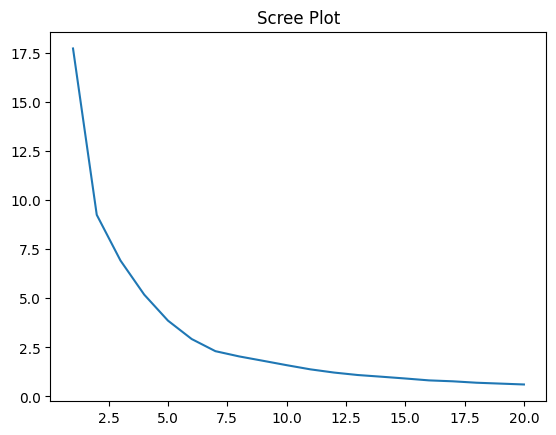

In [36]:
# finding the optimal number of clusters using a scree plot. 
k_bar = 20
SSE = [] # training error 
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X3) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector  
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot
plt.show()

Our scree plot does not have a defined "elbow" - its slope flattens very gently - but the optimal number of clusters is likely 16 (the slope does not become visibly flatter past 17.5, but I feel excessive using 17 clusters; additionally, 17 is a very ugly number). 

Nevermind I plotted the scatterplot and 16 looks WAY overfit. We're flying with 10. 

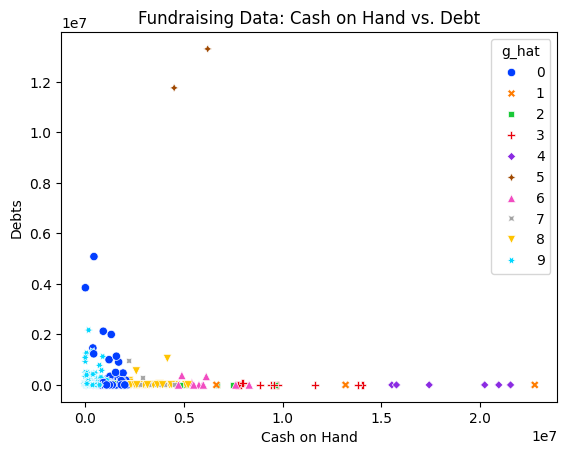

In [37]:
# creating a scatterplot of our dots

# yoinked code from previous question.  
model = KMeans(n_clusters=10, random_state=0) # canned kmeans model 
model = model.fit(X3) # fitting it over X2 
fundraising_data['g_hat'] = model.predict(X3) # g-hat is our predicted clusters. 
 
this_plot = sns.scatterplot(data=fundraising_data,x='Cash on Hand',y='Debts',
                            palette="bright", hue='g_hat',style='g_hat').set_title('Fundraising Data: Cash on Hand vs. Debt')

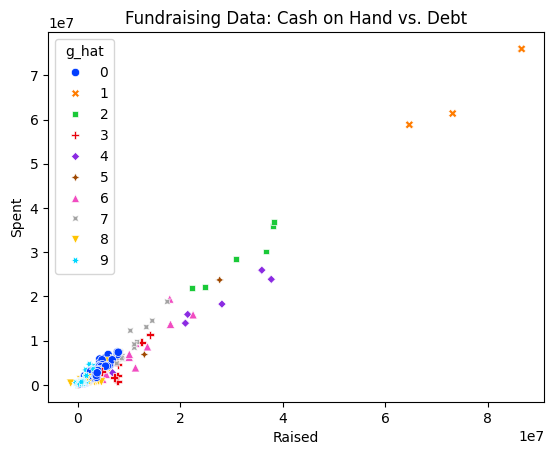

In [38]:
# creating a scatterplot of our dots. again

# yoinked code from previous question.  
model = KMeans(n_clusters=10, random_state=0) # canned kmeans model 
model = model.fit(X3) # fitting it over X2 
fundraising_data['g_hat'] = model.predict(X3) # g-hat is our predicted clusters. 
 
this_plot = sns.scatterplot(data=fundraising_data,x='Raised',y='Spent',
                            palette="bright", hue='g_hat',style='g_hat').set_title('Fundraising Data: Cash on Hand vs. Debt')

When I use all columns with quantitative information for my k-means algorithm, the clusters in my scatterplots are horribly overfit, somewhat nonsensical, and quite useless for deriving insights from the data, especially compared to clusters in previous scatterplots. The scree plot used to determine the optimal value of *k* took into account *four* dimensions of data, so my clusters likely make far more sense in four dimensions than in two. Unfortunately, I am human who uses the human tool "Seaborn" so I cannot visualise a four-dimensional space. I'll ask my alien coworker 

#### question five

When I used the k-means clustering algorithm with two-dimensional data to classify clusters on a two-dimensional scatterplot, I was able to effectively find patterns in the data. In my "Raised vs. Spent Dollars" scatterplot, colouring the clusters highlighted politicians who raised and spent massive amounts of money; likewise, clusters in my "Cash on Hand vs. Debt" scatterplot highlighted both groups of politicians who evaded debt entirely and those who found themselves risking deep financial trouble. 
When used with four-dimensional data, the algorithm was not nearly as stellar, and many clusters were either direly overfit or overlapped with one another. I think I've already addressed my assumptions about why it didn't work out.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?